# 1.Tìm hiểu dữ liệu

| application_record.csv |                          |                                                                                             |
|------------------------|--------------------------|---------------------------------------------------------------------------------------------|
| Feature name           | Explanation              | Remarks                                                                                     |
| ID                     | Client number            |                                                                                             |
| CODE_GENDER            | Gender                   |                                                                                             |
| FLAG_OWN_CAR           | Is there a car           |                                                                                             |
| FLAG_OWN_REALTY        | Is there a property      |                                                                                             |
| CNT_CHILDREN           | Number of children       |                                                                                             |
| AMT_INCOME_TOTAL       | Annual income            |                                                                                             |
| NAME_INCOME_TYPE       | Income category          |                                                                                             |
| NAME_EDUCATION_TYPE    | Education level          |                                                                                             |
| NAME_FAMILY_STATUS     | Marital status           |                                                                                             |
| NAME_HOUSING_TYPE      | Way of living            |                                                                                             |
| DAYS_BIRTH             | Birthday                 | Count backwards from current day (0), -1 means yesterday                                    |
| DAYS_EMPLOYED          | Start date of employment | Count backwards from current day(0). If positive, it means the person currently unemployed. |
| FLAG_MOBIL             | Is there a mobile phone  |                                                                                             |
| FLAG_WORK_PHONE        | Is there a work phone    |                                                                                             |
| FLAG_PHONE             | Is there a phone         |                                                                                             |
| FLAG_EMAIL             | Is there an email        |                                                                                             |
| OCCUPATION_TYPE        | Occupation               |                                                                                             |
| CNT_FAM_MEMBERS        | Family size              |                                                                                             |

| credit_record.csv |               |                                                                                                                                                                                                                              |
|:-----------------:|:-------------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| Feature name      | Explanation   | Remarks                                                                                                                                                                                                                      |
| ID                | Client number |                                                                                                                                                                                                                              |
| MONTHS_BALANCE    | Record month  | The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on                                                                                                |
| STATUS            | Status        | 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month |

  1.Binary Features
- Gender
- Having a car or not
- Having house reality or not
- Having a phone or not
- Having an email or not
- Having a Work Phone or not

2. Continuous Variables
- Children Numbers
- Annual Income
- Age
- Working Years
- Family Size

3. Categorical Features
- Income Type
- Occupation Type
- House Type
- Education
- Marriage Condition

In [1]:
# Import thư viện
import numpy as np, pandas as pd
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
import seaborn as sns; sns.set()  
import matplotlib.pyplot as plt

In [2]:
# Đọc data
data = pd.read_csv('/content/application_record.csv')
credit_record = pd.read_csv('/content/credit_record.csv')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


# 2.EDA

## 1.2.Xử lý file Credit. 
1. Các nhóm nợ tín dụng:

Nhóm 1: Dư nợ đủ chuẩn (Các khoản nợ được thanh toán trong hạn + Các khoản nợ quá hạn dưới 10 ngày)

Nhóm 2: Dư nợ cần chú ý (Các khoản nợ quá hạn từ 10 – 90 ngày)

Nhóm 3: Dư nợ dưới tiêu chuẩn (Các khoản nợ quá hạn từ 30 – 90 ngày)

Nhóm 4: Nợ nghi ngờ mất vốn (Các khoản nợ quá hạn từ 90 – 180 ngày)

Nhóm 5: Nợ có khả năng mất vốn (Nợ xấu)(Các khoản nợ quá hạn hơn 180 ngày)

2. Credit - Status

0: 1-29 days past due 

1: 30-59 days past due 

2: 60-89 days overdue 

3: 90-119 days overdue 

4: 120-149 days overdue 

5: Overdue or bad debts, write-offs for more than 150 days 

C: paid off that month 

X: No loan for the month

3. Phân nhóm

Nhóm 1 - "Good_Debt": status C, X, 0

Nhóm 2 - "Neutral_Debt": status 1 , 2

Nhóm 3 - "Bad_Debt": status 3, 4, 5

In [4]:
#convert credit status theo các phân nhóm
convert_to = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
credit_record.replace({'STATUS' : convert_to}, inplace=True)

In [5]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt
...,...,...,...
1048570,5150487,-25,Good_Debt
1048571,5150487,-26,Good_Debt
1048572,5150487,-27,Good_Debt
1048573,5150487,-28,Good_Debt


In [6]:
#Đếm các loại nhóm nợ trên mỗi KH
credit_record = credit_record.value_counts(subset=['ID','STATUS']).unstack(fill_value=0)

In [7]:
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt
ID,,,
5001711,0,4,0
5001712,0,19,0
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0
...,...,...,...
5150482,0,18,0
5150483,0,18,0
5150484,0,13,0


In [8]:
# Xếp hạng tín dụng của KH theo đa số của loại nhóm nợ
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 2
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 2
credit_record.loc[(credit_record['Neutral_Debt'] > credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Neutral_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Bad_Debt'] > credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
credit_record.loc[(credit_record['Bad_Debt'] > credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0

In [9]:
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,2.0
5001712,0,19,0,2.0
5001713,0,22,0,2.0
5001714,0,15,0,2.0
5001715,0,60,0,2.0
...,...,...,...,...
5150482,0,18,0,2.0
5150483,0,18,0,2.0
5150484,0,13,0,2.0


In [10]:
print(credit_record['CREDIT_APPROVAL_STATUS'].value_counts())

2.0    40667
1.0     5129
0.0      189
Name: CREDIT_APPROVAL_STATUS, dtype: int64


## 2.2.Data summary

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [13]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45985 entries, 5001711 to 5150487
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bad_Debt                45985 non-null  int64  
 1   Good_Debt               45985 non-null  int64  
 2   Neutral_Debt            45985 non-null  int64  
 3   CREDIT_APPROVAL_STATUS  45985 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.8 MB


In [14]:
credit_record.describe().T

,count,mean,std,min,25%,50%,75%,max
STATUS,,,,,,,,
Bad_Debt,45985.0,0.048625,0.935266,0.0,0.0,0.0,0.0,48.0
Good_Debt,45985.0,22.493878,15.390183,0.0,10.0,19.0,33.0,61.0
Neutral_Debt,45985.0,0.260041,1.071171,0.0,0.0,0.0,0.0,39.0
CREDIT_APPROVAL_STATUS,45985.0,1.880244,0.337101,0.0,2.0,2.0,2.0,2.0


## 2.3.Check Skewness

In [15]:
#Độ lệch (skewness) đo mức độ đối xứng, bất đối xứng của một phân phối. Một phân phối, hoặc tập dữ liệu được xem là đối xứng nếu nó giống nhau ở bên trái và bên phải điểm trung tâm.
data.skew()

<ipython-input-15-97d231e50a68>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


ID                  0.212718
CNT_CHILDREN        1.806941
AMT_INCOME_TOTAL    8.834066
DAYS_BIRTH         -0.160181
DAYS_EMPLOYED       1.739495
FLAG_MOBIL          0.000000
FLAG_WORK_PHONE     1.452898
FLAG_PHONE          0.937568
FLAG_EMAIL          2.522482
CNT_FAM_MEMBERS     0.919676
dtype: float64

In [16]:
credit_record.skew()

STATUS
Bad_Debt                  31.774687
Good_Debt                  0.636273
Neutral_Debt               8.888239
CREDIT_APPROVAL_STATUS    -2.659551
dtype: float64

## 2.4.Graphic_Categorical Features: application_details

In [17]:
def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=data[feature], hue='CODE_GENDER' , data=data)
        plt.legend(loc='best')
        total = len(data[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

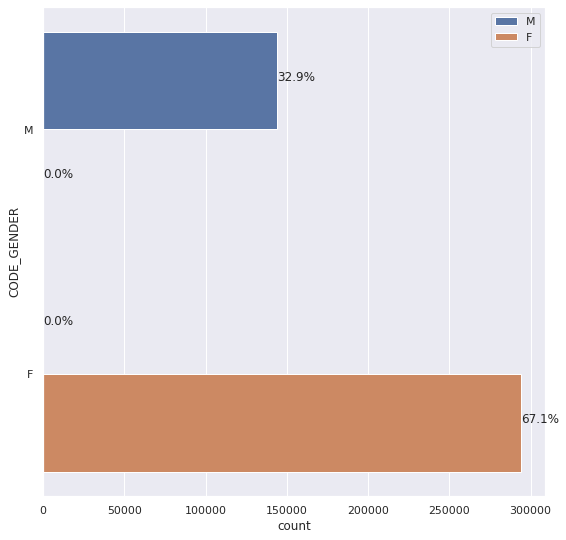

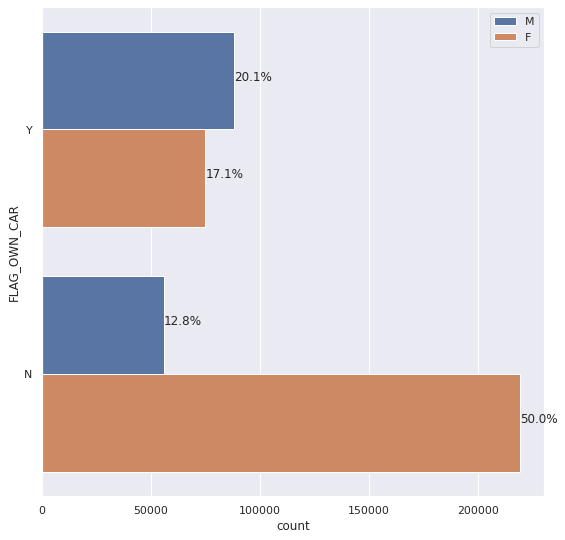

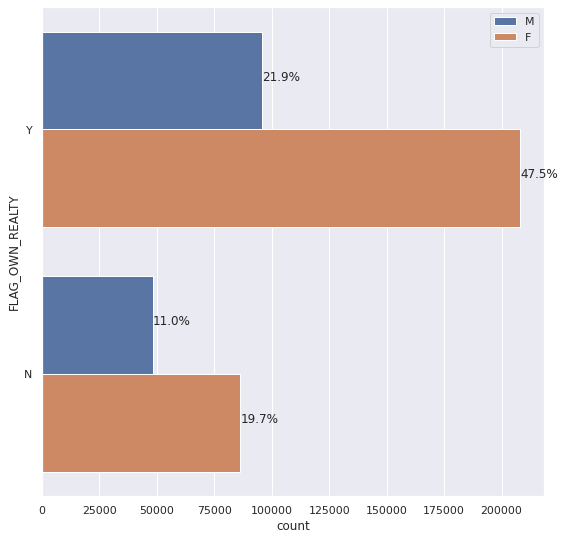

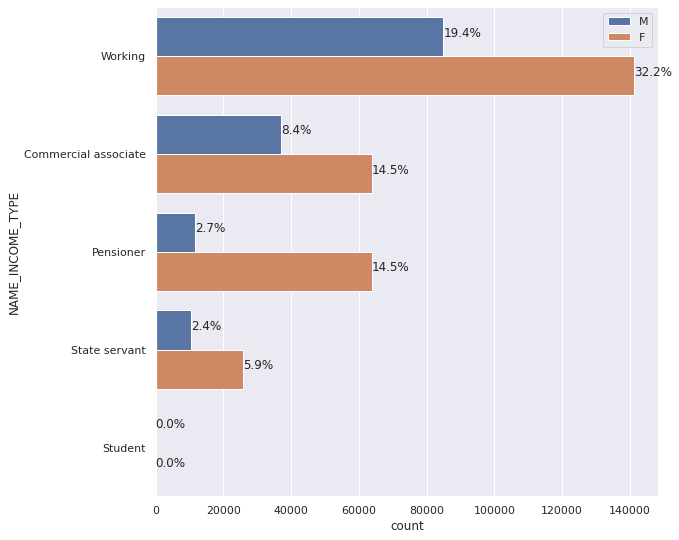

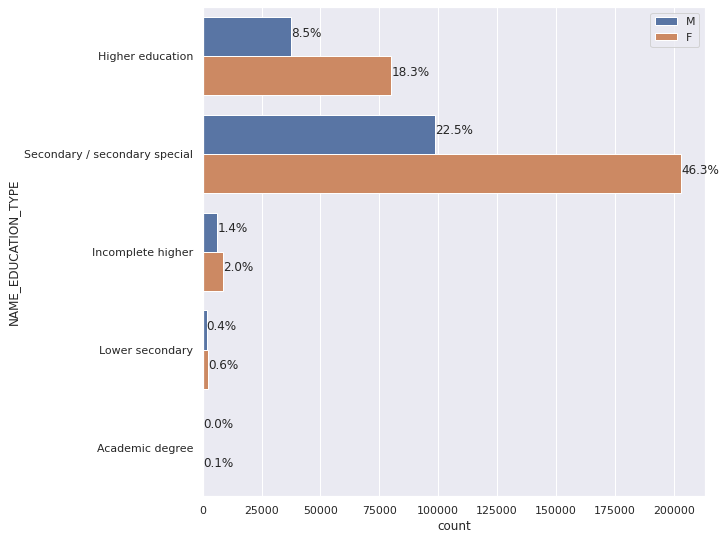

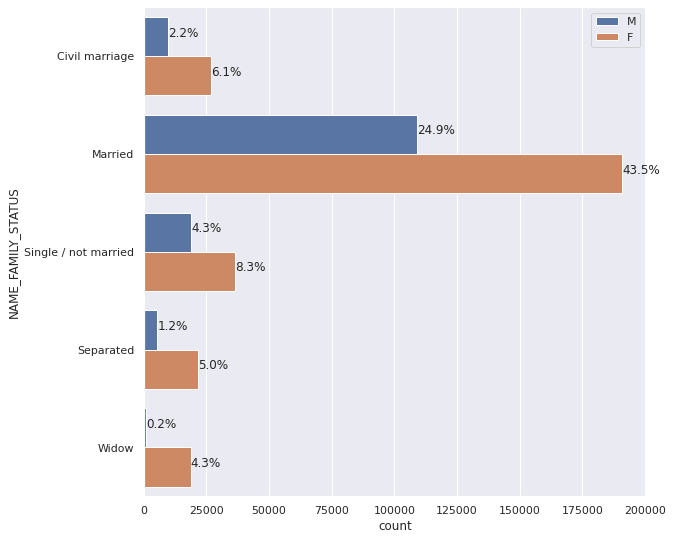

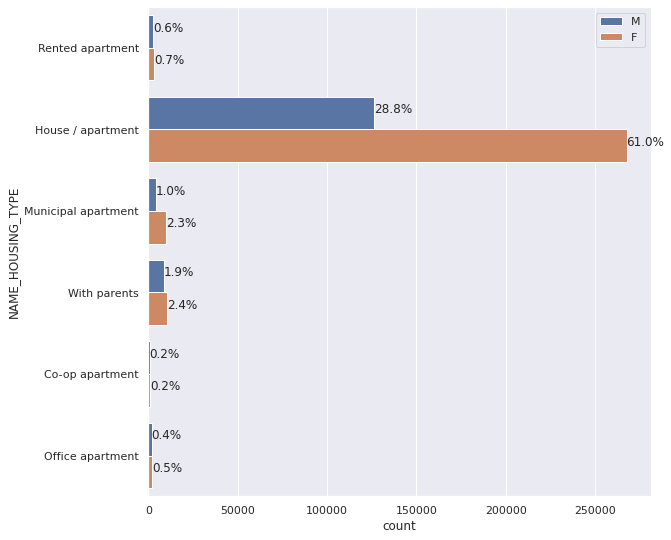

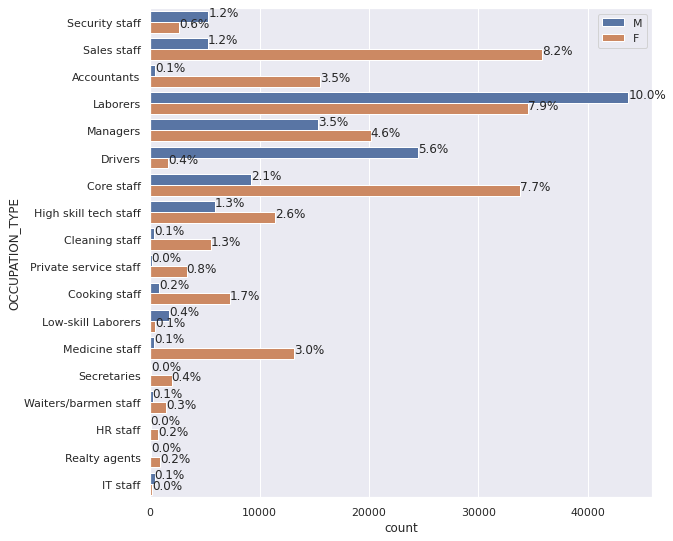

In [18]:
countplot_applicants(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])

Insights from the CountPlot Analysis: applictaion_details

36.9% KH là Nam và 67.1% là nữ

20.1% KH nam và 17.1% KH nữ sở hữu oto

21.9% KH nam và 47.5% KH nữ sở hữu BĐS

19.4% KH nam và 32.2% KH nữ đang làm KD 


8.5% KH nam và 18.3% KH nữ đã học ĐH

22.5% KH nam và 46.3% KH nữ đã học trung học

24.9% KH nam và 43.5% KH nữ đã kết hôn

28.8% KH nam và 61.0% nữ sống tại chung cư

# 3.Pre-processing data

## 3.1.Missing Values: application_details

In [19]:
data.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [20]:
data.shape

(438557, 18)

In [21]:
#remove missing value
data.dropna(subset = ["OCCUPATION_TYPE"],inplace = True)
data.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [22]:
data.shape

(304354, 18)

## 3.2.Thêm cột Age

In [23]:
# Quy đổi tuổi từ DAY_BIRTH
data['AGE'] = data['DAYS_BIRTH']/-365
# Quy đổi DAYS_EMPLOY
data['YEARS_EMPLOY'] = data['DAYS_EMPLOYED']/-365
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOY
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,58.832877,3.106849
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.356164,8.358904
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.356164,8.358904
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.356164,8.358904
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.356164,8.358904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,M,N,Y,0,202500.0,Working,Higher education,Civil marriage,House / apartment,-13510,-2309,1,1,0,0,Laborers,2.0,37.013699,6.326027
438548,6839936,M,Y,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-12569,-2095,1,0,0,0,Laborers,3.0,34.435616,5.739726
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,43.668493,8.238356
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,22.380822,1.019178


## 3.3.Xử lý AMT_INCOME_TOTAL

(20.276, 699.3]     303154
(699.3, 1371.6]       1073
(1371.6, 2043.9]        80
(2043.9, 2716.2]         7
(2716.2, 3388.5]        11
(3388.5, 4060.8]        12
(4060.8, 4733.1]        10
(4733.1, 5405.4]         0
(5405.4, 6077.7]         0
(6077.7, 6750.0]         7
Name: AMT_INCOME_TOTAL, dtype: int64


<Axes: ylabel='Frequency'>

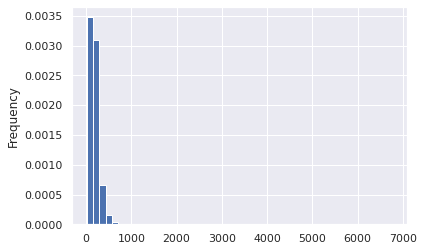

In [24]:
data['AMT_INCOME_TOTAL'] = data['AMT_INCOME_TOTAL']/1000
print(data['AMT_INCOME_TOTAL'].value_counts(bins=10,sort=False))
data['AMT_INCOME_TOTAL'].plot(kind='hist',bins=50,density=True)

## 3.4.Mã hoá dữ liệu

In [25]:
#Mã hóa dùng thư viện LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder #Thư viện mã hóa LabelEncoder
cols =['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE'] 
data[cols] = data[cols].apply(LabelEncoder().fit_transform) 

CODE_GENDER --> {'F': 0, 'M': 1}

FLAG_OWN_CAR --> {'N': 0, 'Y': 1}

FLAG_OWN_REALTY --> {'N': 0, 'Y': 1}

NAME_INCOME_TYPE --> {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}

NAME_FAMILY_STATUS --> {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}

OCCUPATION_TYPE --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Waiters/barmen staff': 17}

NAME_HOUSING_TYPE --> {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}

NAME_EDUCATION_TYPE --> {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4}

In [26]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOY
2,5008806,1,1,1,0,112.5,4,4,1,1,-21474,-1134,1,0,0,0,16,2.0,58.832877,3.106849
3,5008808,0,0,1,0,270.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0,52.356164,8.358904
4,5008809,0,0,1,0,270.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0,52.356164,8.358904
5,5008810,0,0,1,0,270.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0,52.356164,8.358904
6,5008811,0,0,1,0,270.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0,52.356164,8.358904


## 3.5.Credit_record Data

In [27]:
credit_record.drop(['Bad_Debt', 'Good_Debt', 'Neutral_Debt'], axis=1, inplace=True)
credit_record

STATUS,CREDIT_APPROVAL_STATUS
ID,
5001711,2.0
5001712,2.0
5001713,2.0
5001714,2.0
5001715,2.0
...,...
5150482,2.0
5150483,2.0
5150484,2.0


## 3.6.Merge 2 file dữ liệu theo trường ID

In [28]:
df = data.merge(credit_record, on="ID", how='inner')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOY,CREDIT_APPROVAL_STATUS
0,5008806,1,1,1,0,112.5,4,4,1,1,...,-1134,1,0,0,0,16,2.0,58.832877,3.106849,2.0
1,5008808,0,0,1,0,270.0,0,4,3,1,...,-3051,1,0,1,1,14,1.0,52.356164,8.358904,2.0
2,5008809,0,0,1,0,270.0,0,4,3,1,...,-3051,1,0,1,1,14,1.0,52.356164,8.358904,2.0
3,5008810,0,0,1,0,270.0,0,4,3,1,...,-3051,1,0,1,1,14,1.0,52.356164,8.358904,2.0
4,5008811,0,0,1,0,270.0,0,4,3,1,...,-3051,1,0,1,1,14,1.0,52.356164,8.358904,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,5149828,1,1,1,0,315.0,4,4,1,1,...,-2420,1,0,0,0,10,2.0,47.528767,6.630137,0.0
25130,5149834,0,0,1,0,157.5,0,1,1,1,...,-1325,1,0,1,1,11,2.0,33.936986,3.630137,0.0
25131,5149838,0,0,1,0,157.5,1,1,1,1,...,-1325,1,0,1,1,11,2.0,33.936986,3.630137,2.0
25132,5150049,0,0,1,0,283.5,4,4,1,1,...,-655,1,0,0,0,14,2.0,49.200000,1.794521,1.0


## 3.7.Drop cột ID, FLAG_PHONE

In [29]:
#bỏ cột ID
df = df.drop('ID', axis=1, inplace=False)
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOY,CREDIT_APPROVAL_STATUS
0,1,1,1,0,112.5,4,4,1,1,-21474,-1134,1,0,0,0,16,2.0,58.832877,3.106849,2.0
1,0,0,1,0,270.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0,52.356164,8.358904,2.0
2,0,0,1,0,270.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0,52.356164,8.358904,2.0
3,0,0,1,0,270.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0,52.356164,8.358904,2.0
4,0,0,1,0,270.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0,52.356164,8.358904,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,1,1,1,0,315.0,4,4,1,1,-17348,-2420,1,0,0,0,10,2.0,47.528767,6.630137,0.0
25130,0,0,1,0,157.5,0,1,1,1,-12387,-1325,1,0,1,1,11,2.0,33.936986,3.630137,0.0
25131,0,0,1,0,157.5,1,1,1,1,-12387,-1325,1,0,1,1,11,2.0,33.936986,3.630137,2.0
25132,0,0,1,0,283.5,4,4,1,1,-17958,-655,1,0,0,0,14,2.0,49.200000,1.794521,1.0


In [30]:
#Check somes statistical information (df.describe())
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CODE_GENDER,25134.0,0.378133,0.484931,0.000000,0.000000,0.000000,1.000000,1.000000
FLAG_OWN_CAR,25134.0,0.418397,0.493306,0.000000,0.000000,0.000000,1.000000,1.000000
FLAG_OWN_REALTY,25134.0,0.654930,0.475401,0.000000,0.000000,1.000000,1.000000,1.000000
CNT_CHILDREN,25134.0,0.512334,0.787785,0.000000,0.000000,0.000000,1.000000,19.000000
AMT_INCOME_TOTAL,25134.0,194.833851,104.510987,27.000000,135.000000,180.000000,225.000000,1575.000000
NAME_INCOME_TYPE,25134.0,2.681825,1.773317,0.000000,0.000000,4.000000,4.000000,4.000000
NAME_EDUCATION_TYPE,25134.0,3.060038,1.358220,0.000000,1.000000,4.000000,4.000000,4.000000
NAME_FAMILY_STATUS,25134.0,1.316862,0.893762,0.000000,1.000000,1.000000,1.000000,4.000000
NAME_HOUSING_TYPE,25134.0,1.322074,1.016785,0.000000,1.000000,1.000000,1.000000,5.000000
DAYS_BIRTH,25134.0,-14794.037638,3486.969790,-24611.000000,-17438.000000,-14547.000000,-11964.000000,-7489.000000


=> Trường FLAG_PHONE tất cả các dòng đều có chung 1 giá trị => Bỏ ra khỏi bảng

In [31]:
df = df.drop(['FLAG_PHONE','DAYS_BIRTH','DAYS_EMPLOYED'], axis=1, inplace=False)
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOY,CREDIT_APPROVAL_STATUS
0,1,1,1,0,112.5,4,4,1,1,1,0,0,16,2.0,58.832877,3.106849,2.0
1,0,0,1,0,270.0,0,4,3,1,1,0,1,14,1.0,52.356164,8.358904,2.0
2,0,0,1,0,270.0,0,4,3,1,1,0,1,14,1.0,52.356164,8.358904,2.0
3,0,0,1,0,270.0,0,4,3,1,1,0,1,14,1.0,52.356164,8.358904,2.0
4,0,0,1,0,270.0,0,4,3,1,1,0,1,14,1.0,52.356164,8.358904,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,1,1,1,0,315.0,4,4,1,1,1,0,0,10,2.0,47.528767,6.630137,0.0
25130,0,0,1,0,157.5,0,1,1,1,1,0,1,11,2.0,33.936986,3.630137,0.0
25131,0,0,1,0,157.5,1,1,1,1,1,0,1,11,2.0,33.936986,3.630137,2.0
25132,0,0,1,0,283.5,4,4,1,1,1,0,0,14,2.0,49.200000,1.794521,1.0


<Axes: >

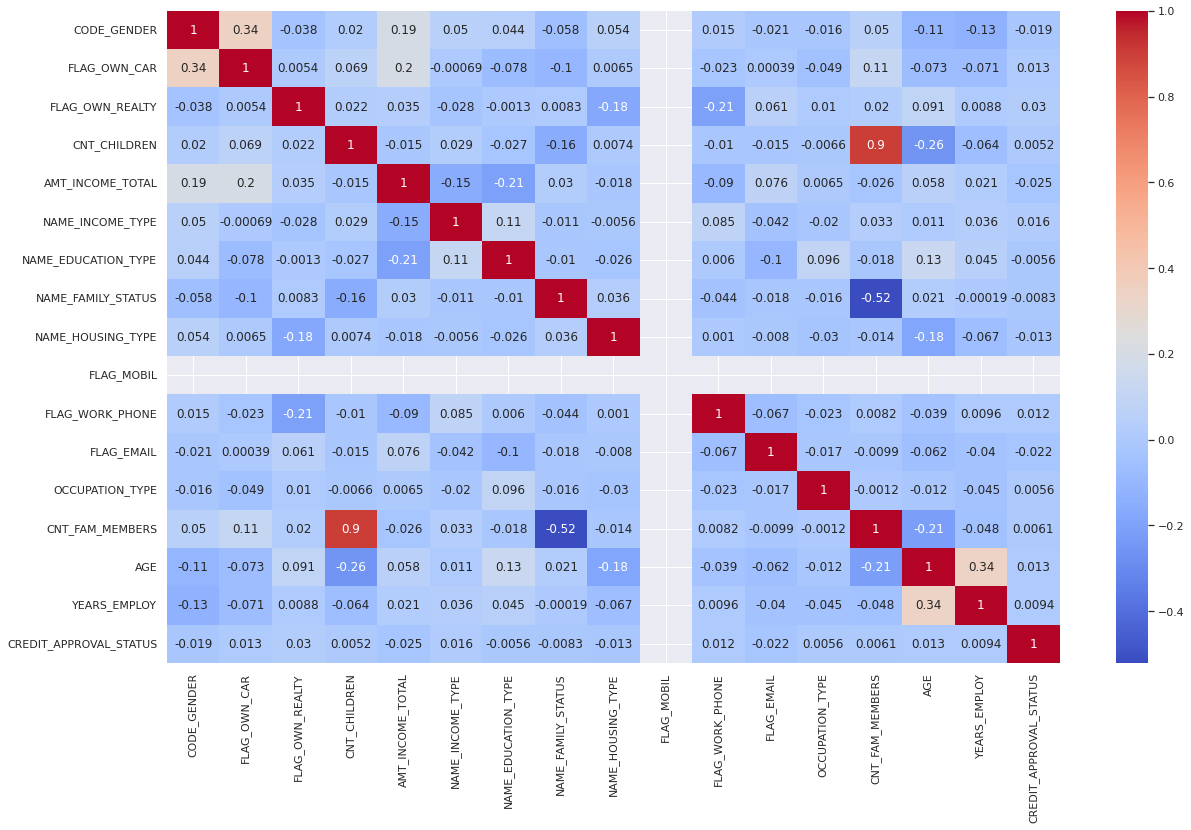

In [32]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [33]:
print(df['CREDIT_APPROVAL_STATUS'].value_counts())

2.0    22064
1.0     2955
0.0      115
Name: CREDIT_APPROVAL_STATUS, dtype: int64


##3.8.Splitting the DF into training and testing sets

In [34]:
from sklearn.model_selection import train_test_split
X = df.drop('CREDIT_APPROVAL_STATUS', axis=1)
y = df['CREDIT_APPROVAL_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3.9.Xử lý undersampling

In [35]:
#Xử lý với tập train
from imblearn.over_sampling import SMOTE
SM_Model=SMOTE()
X_train, y_train=SM_Model.fit_resample(X_train,y_train)
X_train.shape, y_train.shape

((46320, 16), (46320,))

#4.Model


## 4.1.Decision Tree Model

In [36]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [37]:
#Training Model
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [38]:
#Prediction
y_pred = DT_model.predict(X_test)

In [39]:
#Accuracy Score
from sklearn.metrics import accuracy_score
Acc1 = accuracy_score(y_test, y_pred)
Acc1

0.6651637713831057

In [40]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [41]:
text_representation = tree.export_text(DT_model)
print(text_representation)

|--- feature_10 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_15 <= 4.18
|   |   |   |--- feature_14 <= 34.78
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_14 >  34.78
|   |   |   |   |--- class: 0.0
|   |   |--- feature_15 >  4.18
|   |   |   |--- feature_12 <= 9.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_12 >  9.50
|   |   |   |   |--- class: 1.0
|   |--- feature_2 >  0.50
|   |   |--- feature_6 <= 3.50
|   |   |   |--- feature_6 <= 1.50
|   |   |   |   |--- class: 2.0
|   |   |   |--- feature_6 >  1.50
|   |   |   |   |--- class: 0.0
|   |   |--- feature_6 >  3.50
|   |   |   |--- feature_12 <= 7.50
|   |   |   |   |--- class: 2.0
|   |   |   |--- feature_12 >  7.50
|   |   |   |   |--- class: 2.0
|--- feature_10 >  0.50
|   |--- feature_14 <= 39.77
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 2.0
|   |   |--- feature_2 >  0.50
|  

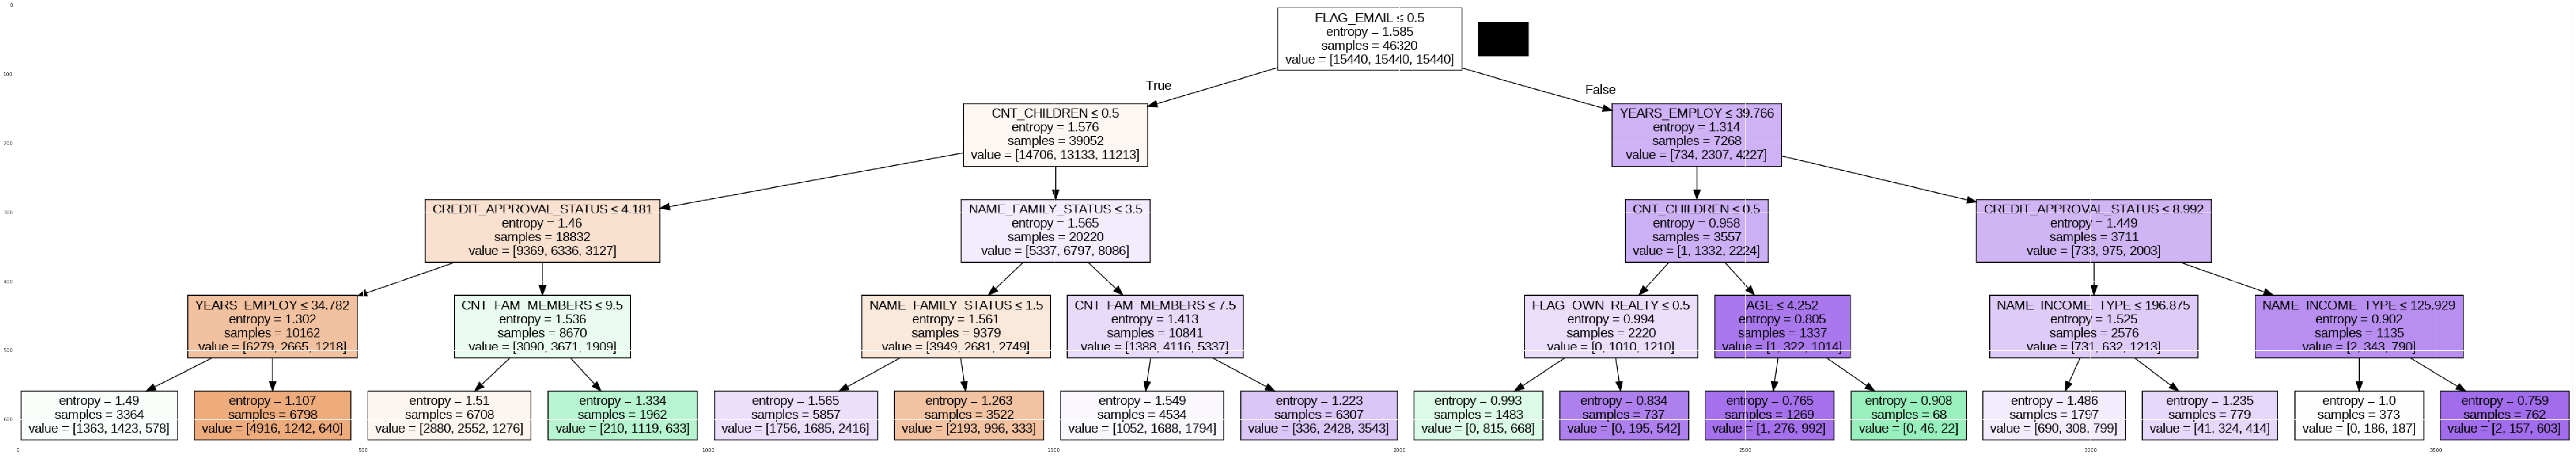

In [42]:
dot_data = StringIO()
filename = "credit_card.png"
featureNames = df.columns[1:18]
targetNames = df["CREDIT_APPROVAL_STATUS"].unique().tolist()
out=tree.export_graphviz(DT_model, feature_names=featureNames, out_file=dot_data, class_names= None, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.01      0.17      0.01        36
         1.0       0.16      0.17      0.16       881
         2.0       0.89      0.73      0.80      6624

    accuracy                           0.67      7541
   macro avg       0.35      0.36      0.32      7541
weighted avg       0.80      0.67      0.72      7541



## 4.2.Gaussian naive bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
(y_test != y_pred).sum()
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 7541 points : 3937


In [45]:
from sklearn.metrics import accuracy_score
Acc2 = accuracy_score(y_test, y_pred) 
Acc2

0.4779207001723909

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.28      0.01        36
         1.0       0.14      0.18      0.16       881
         2.0       0.88      0.52      0.65      6624

    accuracy                           0.48      7541
   macro avg       0.34      0.33      0.27      7541
weighted avg       0.79      0.48      0.59      7541



## 4.3.MultinomialNB

In [47]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)

In [48]:
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 7541 points : 3604


In [49]:
Acc3 = accuracy_score(y_test, y_pred)
Acc3

0.522079299827609

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.25      0.01        36
         1.0       0.13      0.18      0.15       881
         2.0       0.88      0.57      0.69      6624

    accuracy                           0.52      7541
   macro avg       0.34      0.33      0.28      7541
weighted avg       0.79      0.52      0.63      7541



## 4.4.Logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
lr = logreg.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
y_pred=logreg.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 7541 points : 3417


In [53]:
Acc4 = accuracy_score(y_test, y_pred)
Acc4

0.5468770720063652

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.01      0.22      0.01        36
         1.0       0.13      0.24      0.17       881
         2.0       0.88      0.59      0.71      6624

    accuracy                           0.55      7541
   macro avg       0.34      0.35      0.30      7541
weighted avg       0.79      0.55      0.64      7541



## 4.5.SVM

In [55]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparameters
svc=SVC() 

In [56]:
# fit classifier to training set
svc.fit(X_train,y_train)

SVC()

In [57]:
# make predictions on test set
y_pred=svc.predict(X_test)

In [58]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
Acc5 = accuracy_score(y_test, y_pred)

Model accuracy score with default hyperparameters: 0.3584


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.01      0.44      0.01        36
         1.0       0.13      0.37      0.19       881
         2.0       0.88      0.36      0.51      6624

    accuracy                           0.36      7541
   macro avg       0.34      0.39      0.24      7541
weighted avg       0.79      0.36      0.47      7541



## 4.6.Random forest

In [60]:
#model
from sklearn.ensemble import RandomForestClassifier 
loanForest = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
loanForest.fit(X_train, y_train)
#prediction
predForest = loanForest.predict(X_test)
print(predForest[0:5])
print(y_test[0:5])

[2. 2. 2. 2. 2.]
423      2.0
17192    2.0
20649    2.0
1598     2.0
11898    2.0
Name: CREDIT_APPROVAL_STATUS, dtype: float64


In [61]:
#Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, predForest))
Acc6 = metrics.accuracy_score(y_test, predForest)

Random Forest's Accuracy:  0.8546611855191619


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predForest))

              precision    recall  f1-score   support

         0.0       0.38      0.28      0.32        36
         1.0       0.40      0.43      0.41       881
         2.0       0.92      0.91      0.92      6624

    accuracy                           0.85      7541
   macro avg       0.57      0.54      0.55      7541
weighted avg       0.86      0.85      0.86      7541



##4.7.KNN

In [63]:
 from sklearn.datasets import make_blobs #synthetic dataset
 from sklearn.neighbors import KNeighborsClassifier #kNN classifier
 from sklearn.model_selection import train_test_split #train and test sets 

In [64]:
#tìm k tối ưu
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid={'n_neighbors': np.arange(1,50)}, cv=5)

In [65]:
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [66]:
knn_grid.best_params_

{'n_neighbors': 1}

In [69]:
Acc7 = knn_grid.best_score_
Acc7

0.8859455958549223

# 5.Summary

In [71]:
print("Accuracy of Decision Tree is:", 100 * Acc1, '%')
print("Accuracy of GNB is:", 100 * Acc2, '%')
print("Accuracy of MNB is:", 100 * Acc3, '%')
print("Accuracy of LR is:", 100 * Acc4, '%')
print("Accuracy of SVM is:", 100 * Acc5, '%')
print("Accuracy of Random Forest is:", 100 * Acc6, '%')
print("Accuracy of knn is:", 100 * Acc7, '%')

Accuracy of Decision Tree is: 66.51637713831057 %
Accuracy of GNB is: 47.79207001723909 %
Accuracy of MNB is: 52.2079299827609 %
Accuracy of LR is: 54.68770720063652 %
Accuracy of SVM is: 35.844052512929316 %
Accuracy of Random Forest is: 85.4661185519162 %
Accuracy of knn is: 88.59455958549222 %


Từ kết quả trên có thể thấy rằng mức độ chính xác của mô hình Random Forest và KNN cao nhất (85% và 88%)

# 6.BOOSTING

## 6.1.Adaboost

In [72]:
#Test với AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier()
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.1, 0.5, 1.0]}

In [73]:
# Fit the model on the training data
##grid_ada = GridSearchCV(ada, param_grid=param_grid, scoring='accuracy', cv=5)
##grid_ada.fit(X_train,y_train)
##print("Best Hyperparameters: ", grid_ada.best_params_)

In [74]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 1, min_samples_split= 5),n_estimators=150, learning_rate=1)
y_pred = ada.fit(X_train, y_train).predict(X_test)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.41      0.31      0.35        36
         1.0       0.25      0.37      0.30       881
         2.0       0.91      0.85      0.88      6624

    accuracy                           0.79      7541
   macro avg       0.52      0.51      0.51      7541
weighted avg       0.83      0.79      0.81      7541



## 6.2.GradientBoost

In [79]:
#Test với GradientBoost
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
model = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 60.58%


## 6.3.XGBoost

In [81]:
#Test với XGBoost
import xgboost as xgb

In [82]:
model = xgb.XGBClassifier(random_state=1, eta=0.01)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 69.45%


| Model         | Accuracy rate |
|---------------|---------------|
| Decision Tree | 62.67 %       |
| GNB           | 47.82 %       |
| MNB           | 52.23 %       |
| LR            | 54.58 %       |
| SVM           | 37.78 %       |
| Random Forest | 85.22 %       |
| KNN           | 88.43 %       |
| Adaboost      | 79 %          |
| GradientBoost | 60.58 %       |
| XGBoost       | 69.45 %       |


In [84]:
df.to_csv('final.csv',index=False)

In [86]:
credit_record.to_csv('credit_v2.csv',index=False)